In [15]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt
import openai
import requests
from io import BytesIO
import torchvision
import numpy as np
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import heapq

In [ ]:
class Classifier:
    def __init__(self, labels):
        self.labels = labels
        self.descriptors={label: [] for label in labels}
        self.clip_model, self.preprocess = clip.load("ViT-B/32", device=device)
        self.gpt=#todo
        self.tokenizer=#todo
        self.device="cuda" if torch.cuda.is_available() else "cpu"
        self.threshold=0.5
    def descriptors_fn(self):
        for label in self.labels
            # Method code here with GPT
            descriptors=[label+' which is/has '+descriptor for descriptor in descriptors]
            self.descriptors[label]=descriptors
    def similarity(self,images_,label):
        # Method code here
        images = self.preprocess(images_).to(device)
        if len(images.shape)==2:
            images=images.unsqueeze(0)
        token_desc = clip.tokenize(self.descriptors[label]).to(device)
        with torch.no_grad():
            logits_per_image, logits_per_descriptor = model(image, token_desc)
            similarity=np.mean(logits_per_image.cpu().numpy(),axis=1)
        return similarity,logits_per_image.numpy()
    
    def classify(self,image):
        similarities=[(label,similarity(image,label)[0].item()) for label in labels]
        top_labels = heapq.nlargest(5, pairs)
        top_labels=[(pair[0],np.exp(pair[1])*100) for pair in top_labels ]
        plt.imshow(image)
        print('This image may show: ')
        for i,pair in enumerate(top_labels):
            print('{}) {}: {}%'.format(i+1,pair[0],pair[1]))
    
    def explain(self,image,label):
        descriptors=self.descriptors[label]
        descriptors_similarity=np.exp(similarity(image,label)[1])[0]
        plt.imshow(image)
        print(label+' is characterized by the following features: ')
        for i in range(len(descriptors)):
            if descriptors_similarity[i]>self.threshold:
                print('\U00002705 {}: {}%'.format(descriptors[i],descriptors_similarity[i]*100))     #green check emoji
            else:
                print('\U0000274C {}: {}%'.format(descriptors[i],descriptors_similarity[i]*100))  #red mark emoji
            

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [11]:
image = preprocess(Image.open("clip.jpg")).unsqueeze(0).to(device)
text = clip.tokenize(["eiffel tower", "pisa tower", "burj khalifa"]).to(device)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


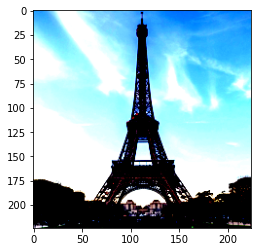

In [12]:
plt.imshow(image.squeeze().permute(1, 2, 0))

In [23]:
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", np.mean(probs,axis=0))

Label probs: [9.9871421e-01 1.2465981e-03 3.9111921e-05]


In [6]:
# Load the GPT-2 model and tokenizer
model_name = 'gpt2-large'
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

In [7]:
# Define the function that generates features for a category

def generate_features(category):
    # Generate the input text for the GPT-2 model
    input_text = f"Q: What are useful features for distinguishing a {category} in a photo without any explanation?\nA: There are several useful visual features to tell there is a {category} in a photo:\n-"
    input_ids = tokenizer.encode(input_text, return_tensors='pt')

    # Generate text from the GPT-2 model
    output = model.generate(input_ids, max_length=100,pad_token_id=tokenizer.eos_token_id, do_sample=True, temperature=0.7)
    output_text = tokenizer.decode(output[0], skip_special_tokens=True)



    return output_text


In [8]:
# Example usage
category = 'store'
features = generate_features(category)
print(features)

Q: What are useful features for distinguishing a store in a photo without any explanation?
A: There are several useful visual features to tell there is a store in a photo:
- The store is large
The store is in a well-lit area
The store is in the center of the photo
- The store is in a location that is not the one shown on a map
- The store is in a well-lit area with no trees
- The store is in a
